In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()

['input.csv',
 '.DS_Store',
 'data_old',
 'train_aug.csv',
 'test_aug.csv',
 'scaler.sk',
 'output.csv',
 'EDA_aug.ipynb',
 '.gitignore',
 'NN_Implementation.ipynb',
 'input.ods',
 '.ipynb_checkpoints',
 'best_model.cb',
 '.git',
 'test2_aug.csv',
 'EDA and lightgbm.ipynb',
 'catboost_info']

In [3]:
train = pd.read_csv('train_aug.csv')
test = pd.read_csv('test_aug.csv')
test2 = pd.read_csv('test2_aug.csv')

In [4]:
train.head()

,DT,GR,NPHI,PHIe,RHOB,Vclay,Perm
0,69.8504,60.8720,0.1093,0.0977,2.5151,0.1250,2.00
1,67.5159,53.7627,0.0724,0.0662,2.5735,0.0833,0.73
2,65.8811,52.1133,0.0643,0.0442,2.6319,0.1234,9.80
3,73.0684,59.8009,0.1291,0.1070,2.5154,0.1555,82.00
4,77.6376,58.7805,0.1468,0.1247,2.4871,0.1522,0.05


In [5]:
feature_cols = [c for c in list(train) if c not in ['Perm']]

In [6]:
X_train = train[feature_cols].copy()
y_train = train['Perm'].copy()

X_test = test[feature_cols].copy()
X_test_2 = test2[feature_cols].copy()

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test_2 = sc.transform(X_test_2)

y_train = np.log1p(y_train)

/Users/2359media/anaconda/envs/yolo-keras/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


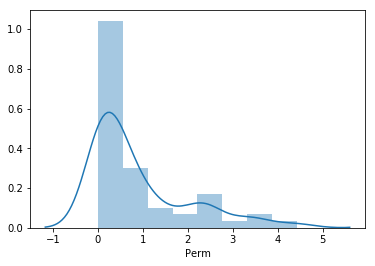

In [21]:
sns.distplot(y_train)

In [8]:
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, 
#     test_size = 0.25, random_state = 197)

In [9]:
import catboost as cb

model = cb.CatBoostRegressor(verbose=True)
model.fit(X_train, y_train)

0:	learn: 1.3819151	total: 65.3ms	remaining: 1m 5s
1:	learn: 1.3651930	total: 71.4ms	remaining: 35.6s
2:	learn: 1.3487221	total: 78.9ms	remaining: 26.2s
3:	learn: 1.3324106	total: 84.8ms	remaining: 21.1s
4:	learn: 1.3171756	total: 91.5ms	remaining: 18.2s
5:	learn: 1.3037578	total: 94.7ms	remaining: 15.7s
6:	learn: 1.2876546	total: 97.5ms	remaining: 13.8s
7:	learn: 1.2729645	total: 100ms	remaining: 12.5s
8:	learn: 1.2587131	total: 105ms	remaining: 11.5s
9:	learn: 1.2458502	total: 110ms	remaining: 10.8s
10:	learn: 1.2336543	total: 113ms	remaining: 10.1s
11:	learn: 1.2225282	total: 116ms	remaining: 9.54s
12:	learn: 1.2107984	total: 123ms	remaining: 9.35s
13:	learn: 1.1981340	total: 127ms	remaining: 8.95s
14:	learn: 1.1865791	total: 132ms	remaining: 8.65s
15:	learn: 1.1743715	total: 138ms	remaining: 8.47s
16:	learn: 1.1642094	total: 141ms	remaining: 8.18s
17:	learn: 1.1534169	total: 145ms	remaining: 7.91s
18:	learn: 1.1444330	total: 149ms	remaining: 7.7s
19:	learn: 1.1353998	total: 156ms	r

164:	learn: 0.6308540	total: 2.18s	remaining: 11s
165:	learn: 0.6283793	total: 2.19s	remaining: 11s
166:	learn: 0.6256361	total: 2.19s	remaining: 10.9s
167:	learn: 0.6239373	total: 2.21s	remaining: 10.9s
168:	learn: 0.6222237	total: 2.22s	remaining: 10.9s
169:	learn: 0.6189463	total: 2.22s	remaining: 10.8s
170:	learn: 0.6180540	total: 2.23s	remaining: 10.8s
171:	learn: 0.6151833	total: 2.23s	remaining: 10.7s
172:	learn: 0.6122117	total: 2.24s	remaining: 10.7s
173:	learn: 0.6090298	total: 2.25s	remaining: 10.7s
174:	learn: 0.6079874	total: 2.25s	remaining: 10.6s
175:	learn: 0.6049434	total: 2.26s	remaining: 10.6s
176:	learn: 0.6021044	total: 2.27s	remaining: 10.5s
177:	learn: 0.5998471	total: 2.27s	remaining: 10.5s
178:	learn: 0.5956523	total: 2.27s	remaining: 10.4s
179:	learn: 0.5914756	total: 2.28s	remaining: 10.4s
180:	learn: 0.5902701	total: 2.28s	remaining: 10.3s
181:	learn: 0.5876552	total: 2.29s	remaining: 10.3s
182:	learn: 0.5860324	total: 2.29s	remaining: 10.2s
183:	learn: 0.58

336:	learn: 0.3275290	total: 3.61s	remaining: 7.1s
337:	learn: 0.3259249	total: 3.62s	remaining: 7.09s
338:	learn: 0.3241220	total: 3.63s	remaining: 7.07s
339:	learn: 0.3237072	total: 3.65s	remaining: 7.08s
340:	learn: 0.3224554	total: 3.66s	remaining: 7.07s
341:	learn: 0.3214844	total: 3.67s	remaining: 7.05s
342:	learn: 0.3206522	total: 3.67s	remaining: 7.03s
343:	learn: 0.3195098	total: 3.68s	remaining: 7.01s
344:	learn: 0.3188394	total: 3.69s	remaining: 7s
345:	learn: 0.3178398	total: 3.7s	remaining: 6.99s
346:	learn: 0.3175527	total: 3.71s	remaining: 6.98s
347:	learn: 0.3162683	total: 3.71s	remaining: 6.96s
348:	learn: 0.3150135	total: 3.72s	remaining: 6.95s
349:	learn: 0.3137270	total: 3.73s	remaining: 6.93s
350:	learn: 0.3134746	total: 3.74s	remaining: 6.92s
351:	learn: 0.3124550	total: 3.75s	remaining: 6.91s
352:	learn: 0.3112697	total: 3.77s	remaining: 6.91s
353:	learn: 0.3103278	total: 3.78s	remaining: 6.89s
354:	learn: 0.3095793	total: 3.8s	remaining: 6.9s
355:	learn: 0.30865

502:	learn: 0.2122617	total: 4.91s	remaining: 4.85s
503:	learn: 0.2120792	total: 4.92s	remaining: 4.85s
504:	learn: 0.2113874	total: 4.94s	remaining: 4.85s
505:	learn: 0.2109474	total: 4.95s	remaining: 4.83s
506:	learn: 0.2100923	total: 4.96s	remaining: 4.82s
507:	learn: 0.2097015	total: 4.97s	remaining: 4.81s
508:	learn: 0.2095751	total: 4.97s	remaining: 4.8s
509:	learn: 0.2092661	total: 4.98s	remaining: 4.79s
510:	learn: 0.2088244	total: 4.99s	remaining: 4.77s
511:	learn: 0.2086669	total: 4.99s	remaining: 4.76s
512:	learn: 0.2080089	total: 5s	remaining: 4.75s
513:	learn: 0.2073381	total: 5.03s	remaining: 4.76s
514:	learn: 0.2068388	total: 5.07s	remaining: 4.78s
515:	learn: 0.2062919	total: 5.08s	remaining: 4.76s
516:	learn: 0.2059011	total: 5.08s	remaining: 4.75s
517:	learn: 0.2054403	total: 5.1s	remaining: 4.75s
518:	learn: 0.2051148	total: 5.13s	remaining: 4.76s
519:	learn: 0.2044920	total: 5.18s	remaining: 4.78s
520:	learn: 0.2040435	total: 5.18s	remaining: 4.76s
521:	learn: 0.203

661:	learn: 0.1524037	total: 7.33s	remaining: 3.74s
662:	learn: 0.1519025	total: 7.38s	remaining: 3.75s
663:	learn: 0.1514504	total: 7.4s	remaining: 3.75s
664:	learn: 0.1511141	total: 7.42s	remaining: 3.74s
665:	learn: 0.1508535	total: 7.52s	remaining: 3.77s
666:	learn: 0.1506580	total: 7.6s	remaining: 3.79s
667:	learn: 0.1504287	total: 7.62s	remaining: 3.78s
668:	learn: 0.1502509	total: 7.65s	remaining: 3.78s
669:	learn: 0.1499333	total: 7.7s	remaining: 3.79s
670:	learn: 0.1498233	total: 7.72s	remaining: 3.79s
671:	learn: 0.1496450	total: 7.73s	remaining: 3.77s
672:	learn: 0.1493001	total: 7.74s	remaining: 3.76s
673:	learn: 0.1491387	total: 7.75s	remaining: 3.75s
674:	learn: 0.1489437	total: 7.79s	remaining: 3.75s
675:	learn: 0.1486848	total: 7.81s	remaining: 3.75s
676:	learn: 0.1485923	total: 7.84s	remaining: 3.74s
677:	learn: 0.1483311	total: 7.85s	remaining: 3.73s
678:	learn: 0.1481430	total: 7.86s	remaining: 3.71s
679:	learn: 0.1479928	total: 7.87s	remaining: 3.7s
680:	learn: 0.14

840:	learn: 0.1192933	total: 8.73s	remaining: 1.65s
841:	learn: 0.1191597	total: 8.74s	remaining: 1.64s
842:	learn: 0.1189910	total: 8.75s	remaining: 1.63s
843:	learn: 0.1188975	total: 8.76s	remaining: 1.62s
844:	learn: 0.1187671	total: 8.77s	remaining: 1.61s
845:	learn: 0.1186492	total: 8.78s	remaining: 1.6s
846:	learn: 0.1184299	total: 8.78s	remaining: 1.59s
847:	learn: 0.1183444	total: 8.78s	remaining: 1.57s
848:	learn: 0.1181690	total: 8.79s	remaining: 1.56s
849:	learn: 0.1180916	total: 8.79s	remaining: 1.55s
850:	learn: 0.1179409	total: 8.8s	remaining: 1.54s
851:	learn: 0.1178269	total: 8.8s	remaining: 1.53s
852:	learn: 0.1177379	total: 8.81s	remaining: 1.52s
853:	learn: 0.1176073	total: 8.81s	remaining: 1.51s
854:	learn: 0.1175499	total: 8.82s	remaining: 1.5s
855:	learn: 0.1174365	total: 8.82s	remaining: 1.48s
856:	learn: 0.1173417	total: 8.83s	remaining: 1.47s
857:	learn: 0.1172759	total: 8.83s	remaining: 1.46s
858:	learn: 0.1171907	total: 8.83s	remaining: 1.45s
859:	learn: 0.11

In [10]:
from sklearn.metrics import r2_score

# y_pred = np.expm1(model.predict(X_dev))
# print('Model score: %s' % r2_score(y_pred, np.expm1(y_dev)))
y_pred = model.predict(X_train)
print('Model score: %s' % r2_score(y_pred, y_train))

Model score: 0.9900131961901236


In [11]:
y_pred = np.expm1(model.predict(X_test))
# y_pred = model.predict(X_test)
test['Perm'] = y_pred
test.head()

,DT,GR,NPHI,PHIe,RHOB,Vclay,Perm
0,112.5689,93.9327,0.2972,0.1607,2.4748,0.7331,0.177024
1,111.9286,90.5658,0.2850,0.1591,2.4795,0.6679,0.185923
2,111.8001,90.3752,0.2875,0.1642,2.4676,0.6572,0.352945
3,111.4983,90.2501,0.2827,0.1653,2.4573,0.6358,0.247592
4,111.2193,92.7390,0.2835,0.1608,2.4599,0.6745,0.243976


In [12]:
test.to_csv('test_aug.csv', index=False)

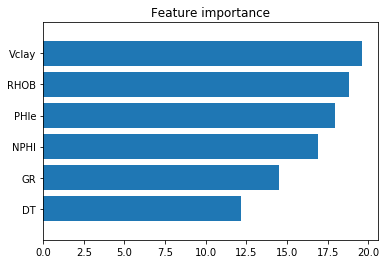

In [32]:
importances = np.array(model.get_feature_importance())
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_cols)
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [14]:
import pickle
model.save_model('best_model.cb')
pickle.dump(sc, open('scaler.sk', 'wb'))

In [15]:
y_pred = np.expm1(model.predict(X_test_2))
test2['Perm'] = y_pred
test2.head()

,Depth,DT,GR,NPHI,PHIe,RHOB,Vclay,Perm
0,3960.0740,80.1676,103.2531,0.1686,0.0371,2.6117,0.4618,0.470150
1,3960.2264,79.5861,107.8271,0.1716,0.0290,2.6100,0.5249,0.503316
2,3960.3788,78.7287,111.3224,0.1768,0.0237,2.6084,0.5773,0.272538
3,3960.5312,79.1144,109.9037,0.1786,0.0280,2.6083,0.5556,0.189615
4,3960.6836,78.7983,107.6251,0.1742,0.0304,2.6110,0.5220,0.503757


In [16]:
test2.to_csv('test2_aug.csv', index=False)